Load Video

1.   Load from Google Drive in Colab
2.   Make directory



In [0]:
# # Google Colab import files in google drive
# !apt-get install -y -qq software-properties-common python-software-properties module-init-tools 

# !add-apt-repository -y ppa:alessandro-strada/ppa
  
# !apt-get update -qq

# !apt-get -y install -qq google-drive-ocamlfuse fuse 

# from google.colab import auth
# auth.authenticate_user()

# from oauth2client.client import GoogleCredentials
# creds = GoogleCredentials.get_application_default()

# import getpass
# !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
# vcode = getpass.getpass()
# !echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
# !mkdir -p drive
# !google-drive-ocamlfuse drive
from google.colab import drive
drive.mount('/content/drive')

In [35]:
!ls 'drive/My Drive/FaceClustering/'

res  Video


In [43]:
!pip install tqdm
from tqdm import tqdm
import cv2 as cv
import numpy as np
import os
import datetime
from matplotlib import pyplot as plt
%matplotlib inline
import shutil

VIDEO_DIR = 'drive/My Drive/FaceClustering/Video/'
VIDEO_FILE_NAME = 'PowerUp.mp4'
# PROGRAM_START_TIME = datetime.datetime.now().strftime('%Y%m%d_%H-%M-%S')
# PROGRAM_START_TIME = datetime.datetime.now().strftime('%Y%m%d')
PROGRAM_START_TIME = '20180827'
SAVE_CROPPED_FACE_DIR = 'drive/My Drive/FaceClustering/Cropped_imgs/' + PROGRAM_START_TIME + '-' + VIDEO_FILE_NAME.split('.')[0]
CASCADE_DIR = 'drive/My Drive/FaceClustering/res/lbpcascade_frontalface_improved.xml'

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv.KMEANS_RANDOM_CENTERS

def make_directory(_directory_name):
    if not os.path.exists(_directory_name):
        os.makedirs(_directory_name)
        
def get_area_of_frame_face_recognition(img, face_cascade):
    grayed_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    # def detectMultiScale(self, image, scaleFactor=None, minNeighbors=None, flags=None, minSize=None, maxSize=None)
    face_area = face_cascade.detectMultiScale(image=grayed_img,scaleFactor=1.3,minNeighbors=5)
    return face_area
  
def get_frame(video_capture, frame):
    video_capture.set(cv.CAP_PROP_POS_FRAMES, frame)
    ret, img = video_capture.read()
    return img, frame, ret

def save_cropped_img(img, faces, frame):
    i = 0
    if len(faces) != 0:
        for (x, y, w, h) in faces:
            iter = 0.4          
            while True:
                try:
                    face_img = img[int(y - h * iter): int(y + (1 + iter) * h),
                                   int(x - w * iter): int(x + (1 + iter) * w)]
                    if int(y - h * iter) < 0 or int(x - w * iter) < 0:
                        raise ValueError('range is false')
                    break
                except:
                    iter = iter * 0.8
                  #             cv.imwrite(SAVE_CROPPED_FACE_DIR + "/" + str(frame) + "_" + str(i) + ".jpg", img[y:y + h, x: x + w])
            try:
                cv.imwrite(SAVE_CROPPED_FACE_DIR + "/" + str(frame) + "_" + str(i) + ".jpg", cv.resize(face_img, (96, 96), interpolation=cv.INTER_AREA))
            except:
                print(int(y - h * iter))
                print(int(x - w * iter))
            i += 1

# this function show image and quit when press q or end
def show_img(img, faces):
    if len(faces) != 0:
        for (x, y, w, h) in faces:
            cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)
    cv.imshow('hello', img)
    if cv.waitKey(1) & 0xFF == ord('q'):
        return False
    else:
        return True
      
def ORB():
    img = cv.imread(SAVE_CROPPED_FACE_DIR + '/130_0.jpg')
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img2 = None
    orb = cv.ORB_create()
    kp, des = orb.detectAndCompute(img, None)
#     img2 = cv.drawKeypoints(img, kp, img2, (0, 0, 255), flags=0)
#     plt.imshow(img2)
    return kp, des 

def HarrisCorner():
    img = cv.imread(SAVE_CROPPED_FACE_DIR + '/130_0.jpg')
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    corners = cv.cornerHarris(img_gray, 2, 3, 0.04)
#     plt.figure(figsize=(6, 6))
#     plt.imshow(corners, cmap='gray')
    return coners

In [44]:
make_directory(SAVE_CROPPED_FACE_DIR)
m_video_capture = cv.VideoCapture(VIDEO_DIR + VIDEO_FILE_NAME)
m_face_cascade = cv.CascadeClassifier(CASCADE_DIR)
TOTAL_FRAME = m_video_capture.get(cv.CAP_PROP_FRAME_COUNT)
FRAME_STEP = 10
LOAD_FAIL = []
if len(os.listdir(SAVE_CROPPED_FACE_DIR)) == 0:
    for frame in tqdm(range(0, int(TOTAL_FRAME), FRAME_STEP)):
        img, frame, ret = get_frame(video_capture=m_video_capture, frame=frame)
        if not ret:
            LOAD_FAIL.append(frame)
            continue
        faces_area = get_area_of_frame_face_recognition(img=img, face_cascade=m_face_cascade)
        save_cropped_img(img, faces_area, frame)
    if len(LOAD_FAIL) > 0:
        print("Fail to load %d of frame(s)" % len(LOAD_FAIL))
        print(LOAD_FAIL)
else:    
    print("Directory is not empty")
    print("Already extracted in %s" % PROGRAM_START_TIME)

100%|██████████| 498/498 [03:22<00:00,  3.62it/s]


In [39]:
SAVE_CROPPED_FACE_DIR

'drive/My Drive/Cropped_imgs/20180827-PowerUp'

In [41]:
!ls 'drive/My Drive/Cropped_imgs/20180827-PowerUp'

1000_0.jpg  170_0.jpg	2680_0.jpg  3300_0.jpg	3840_0.jpg  4770_3.jpg
1010_0.jpg  1860_0.jpg	2680_1.jpg  330_0.jpg	390_0.jpg   4780_0.jpg
1010_1.jpg  1870_0.jpg	2680_2.jpg  3310_0.jpg	3920_0.jpg  4780_1.jpg
1020_0.jpg  1890_0.jpg	2690_0.jpg  3380_0.jpg	3920_1.jpg  4780_2.jpg
1020_1.jpg  1920_0.jpg	2720_0.jpg  3380_1.jpg	3930_0.jpg  4780_3.jpg
1030_0.jpg  1920_1.jpg	2730_0.jpg  3390_0.jpg	3940_0.jpg  480_0.jpg
1030_1.jpg  1930_0.jpg	2740_0.jpg  3390_1.jpg	400_0.jpg   540_0.jpg
1030_2.jpg  1930_1.jpg	2740_1.jpg  3400_0.jpg	4030_0.jpg  550_0.jpg
1090_0.jpg  1990_0.jpg	2750_0.jpg  340_0.jpg	4030_1.jpg  560_0.jpg
1110_0.jpg  2010_0.jpg	2750_1.jpg  3410_0.jpg	4050_0.jpg  570_0.jpg
1200_0.jpg  2020_0.jpg	2880_0.jpg  3460_0.jpg	4050_1.jpg  580_0.jpg
120_0.jpg   2070_0.jpg	2920_0.jpg  3460_1.jpg	4050_2.jpg  590_0.jpg
1210_0.jpg  2150_0.jpg	2940_0.jpg  3470_0.jpg	4060_0.jpg  600_0.jpg
130_0.jpg   2180_0.jpg	2970_0.jpg  3470_1.jpg	4070_0.jpg  620_0.jpg
1340_0.jpg  2190_0.jpg	2970_1.jpg  3490_0.jpg	

In [0]:
face_list = []
face_files = os.listdir(SAVE_CROPPED_FACE_DIR)
for face_file_name in tqdm(face_files):
    img = cv.imread(SAVE_CROPPED_FACE_DIR + '/' + face_file_name)
    img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_blur = cv.GaussianBlur(img_gray, (3,3), 0)
    img_sharp = cv.Laplacian(img_blur, cv.CV_64F)
#     corners = cv.cornerHarris(img_gray, 2, 3, 0.04)
#     face_list.append(img_gray)
    face_list.append(img_sharp.flatten())
#     rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
#     face_list.append(rgb_img)


100%|██████████| 223/223 [00:05<00:00, 43.23it/s]

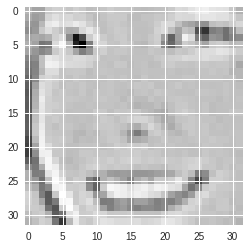

In [0]:
plt.imshow(face_list[10])

In [0]:
face_list = np.float32(face_list)


100%|██████████| 9/9 [00:04<00:00,  2.16it/s]


Text(0,0.5,'compactness')

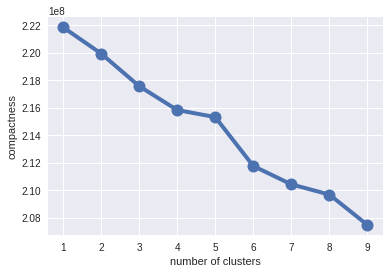

In [0]:
compactness = []
kvals = np.arange(1,10)
for k in tqdm(kvals):
    c, _, _ =  cv.kmeans(face_list, k, None, criteria, 10, flags)
    compactness.append(c)
plt.plot(kvals, compactness, 'o-', linewidth=4,
        markersize=12)
plt.xlabel('number of clusters')
plt.ylabel('compactness')

In [0]:
k = 4
compactness, clusters, centers = cv.kmeans(face_list, k, None, criteria, 10, flags)
make_directory(SAVE_CROPPED_FACE_DIR + "_cluster_" + str(k))
for i in range(k):
    make_directory(SAVE_CROPPED_FACE_DIR + "_cluster_" + str(k) + '/' + str(i))

In [0]:
for f_n, c_k in tqdm(zip(face_files, clusters)):
    print(f_n, c_k )
    shutil.copy2(SAVE_CROPPED_FACE_DIR + '/' + f_n, SAVE_CROPPED_FACE_DIR + "_cluster_" + str(k) + '/' + str(c_k[0]) + '/' + f_n)

In [0]:
def cluster(face_list):
     encodings = face_list

     clt = DBSCAN(metric="euclidean")
     clt.fit(encodings)

     label_ids = np.unique(clt.labels_)
     num_unique_faces = len(np.where(label_ids > -1)[0])

     for label_id in label_ids:
         dir_name = "drive/ID%d" % label_id
         os.mkdir(dir_name)

         indexes = np.where(clt.labels_ == label_id)[0]

         for i in  tqdm(indexes):
             frame_id = face_list[i].frame_id
             box = face_list[i].box
             pathname = os.path.join(self.capture_dir,
                                     self.capture_filename(frame_id))
             image = cv2.imread(pathname)
             face_image = self.getFaceImage(image, box)
             filename = dir_name + "-" + self.capture_filename(frame_id)
             pathname = os.path.join(dir_name, filename)
             cv2.imwrite(pathname, face_image)

In [0]:
face_list[0]

array([ -8., -32., -36., ...,  29.,  -1., -48.], dtype=float32)

In [0]:
from sklearn.cluster import DBSCAN
clt = DBSCAN(metric="euclidean")
clt.fit(face_list)

label_ids = np.unique(clt.labels_)
num_unique_faces = len(np.where(label_ids > -1)[0])

In [0]:
label_ids

array([-1])

In [0]:
clt.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1])

In [0]:
# import the necessary packages
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2

def rect_to_bb(rect):
	# take a bounding predicted by dlib and convert it
	# to the format (x, y, w, h) as we would normally do
	# with OpenCV
	x = rect.left()
	y = rect.top()
	w = rect.right() - x
	h = rect.bottom() - y
 
	# return a tuple of (x, y, w, h)
	return (x, y, w, h)

def shape_to_np(shape, dtype="int"):
	# initialize the list of (x, y)-coordinates
	coords = np.zeros((68, 2), dtype=dtype)
 
	# loop over the 68 facial landmarks and convert them
	# to a 2-tuple of (x, y)-coordinates
	for i in range(0, 68):
		coords[i] = (shape.part(i).x, shape.part(i).y)
 
	# return the list of (x, y)-coordinates
	return coords


 
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-p", "--shape-predictor", required=True,
	help="path to facial landmark predictor")
ap.add_argument("-i", "--image", required=True,
	help="path to input image")
args = vars(ap.parse_args())

# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

# load the input image, resize it, and convert it to grayscale
image = cv2.imread(args["image"])
image = imutils.resize(image, width=500)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
 
# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
	# determine the facial landmarks for the face region, then
	# convert the facial landmark (x, y)-coordinates to a NumPy
	# array
	shape = predictor(gray, rect)
	shape = face_utils.shape_to_np(shape)
 
	# convert dlib's rectangle to a OpenCV-style bounding box
	# [i.e., (x, y, w, h)], then draw the face bounding box
	(x, y, w, h) = face_utils.rect_to_bb(rect)
	cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
 
	# show the face number
	cv2.putText(image, "Face #{}".format(i + 1), (x - 10, y - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
 
	# loop over the (x, y)-coordinates for the facial landmarks
	# and draw them on the image
	for (x, y) in shape:
		cv2.circle(image, (x, y), 1, (0, 0, 255), -1)

# show the output image with the face detections + facial landmarks
cv2.imshow("Output", image)
cv2.waitKey(0)
# 하아앙앙ㅇㅇ아앙앙아앙앙앙앙아앙아아앙앙아ㅏ아아아아아아아아아아앙아아안앙아아아아아아아아아아아니안이ㅏㅇ니ㅏㅇ난안